In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.covariance import EllipticEnvelope
from sklearn.cross_decomposition import CCA
import scipy.stats as stats

In [5]:
# Load the Wine dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Display first few rows
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


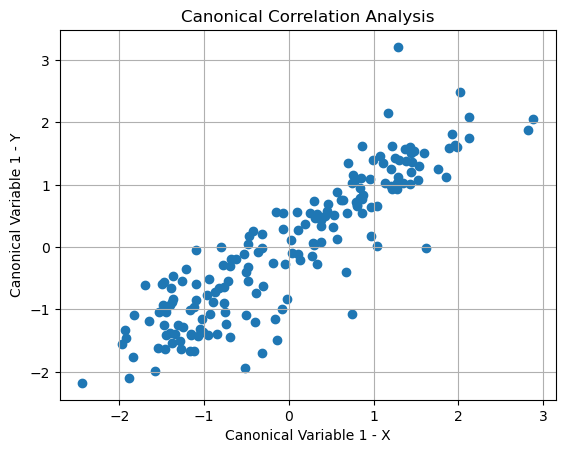

In [7]:
# Split the dataset into two views
X = df.iloc[:, :6]
Y = df.iloc[:, 6:12]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

# Apply CCA
cca = CCA(n_components=2)
X_c, Y_c = cca.fit_transform(X_scaled, Y_scaled)

# Plot canonical variables
plt.scatter(X_c[:, 0], Y_c[:, 0])
plt.xlabel("Canonical Variable 1 - X")
plt.ylabel("Canonical Variable 1 - Y")
plt.title("Canonical Correlation Analysis")
plt.grid(True)
plt.show()

In [9]:
mean_vector = df.mean()
cov_matrix = df.cov()
corr_matrix = df.corr()

print("Mean Vector:\n", mean_vector)
print("\nCovariance Matrix:\n", cov_matrix)
print("\nCorrelation Matrix:\n", corr_matrix)

Mean Vector:
 alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
target                            0.938202
dtype: float64

Covariance Matrix:
                                  alcohol  malic_acid        ash  \
alcohol                         0.659062    0.085611   0.047115   
malic_acid                      0.085611    1.248015   0.050277   
ash                             0.047115    0.050277   0.075265   
alcalinity_of_ash              -0.841093    1.076332   0.406208   
magnesium    

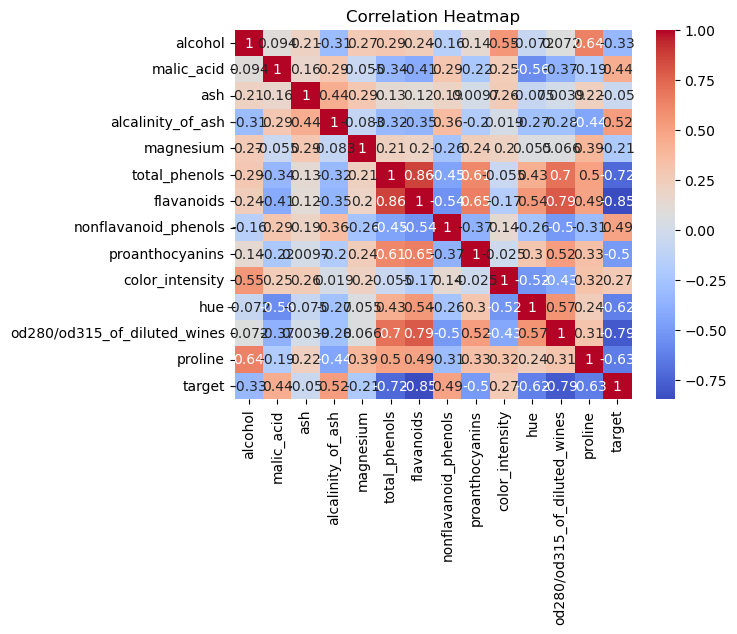

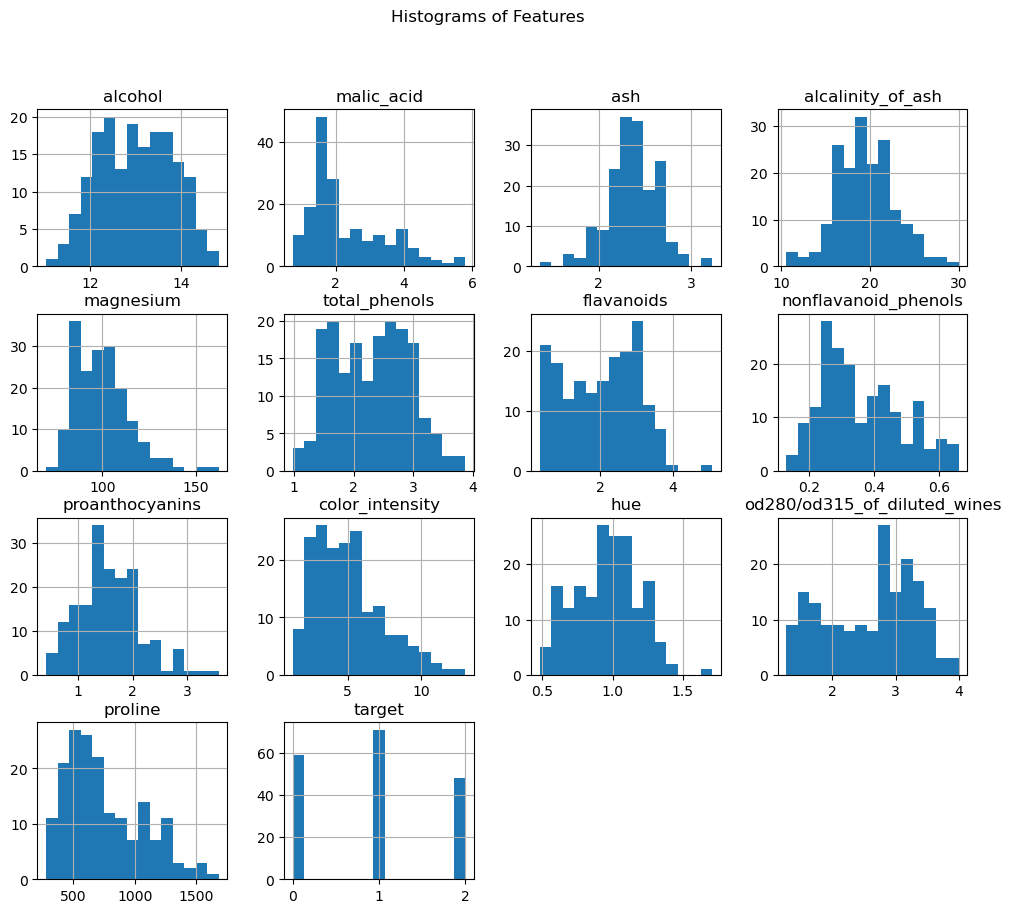

In [11]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

df.hist(figsize=(12, 10), bins=15)
plt.suptitle("Histograms of Features")
plt.show()

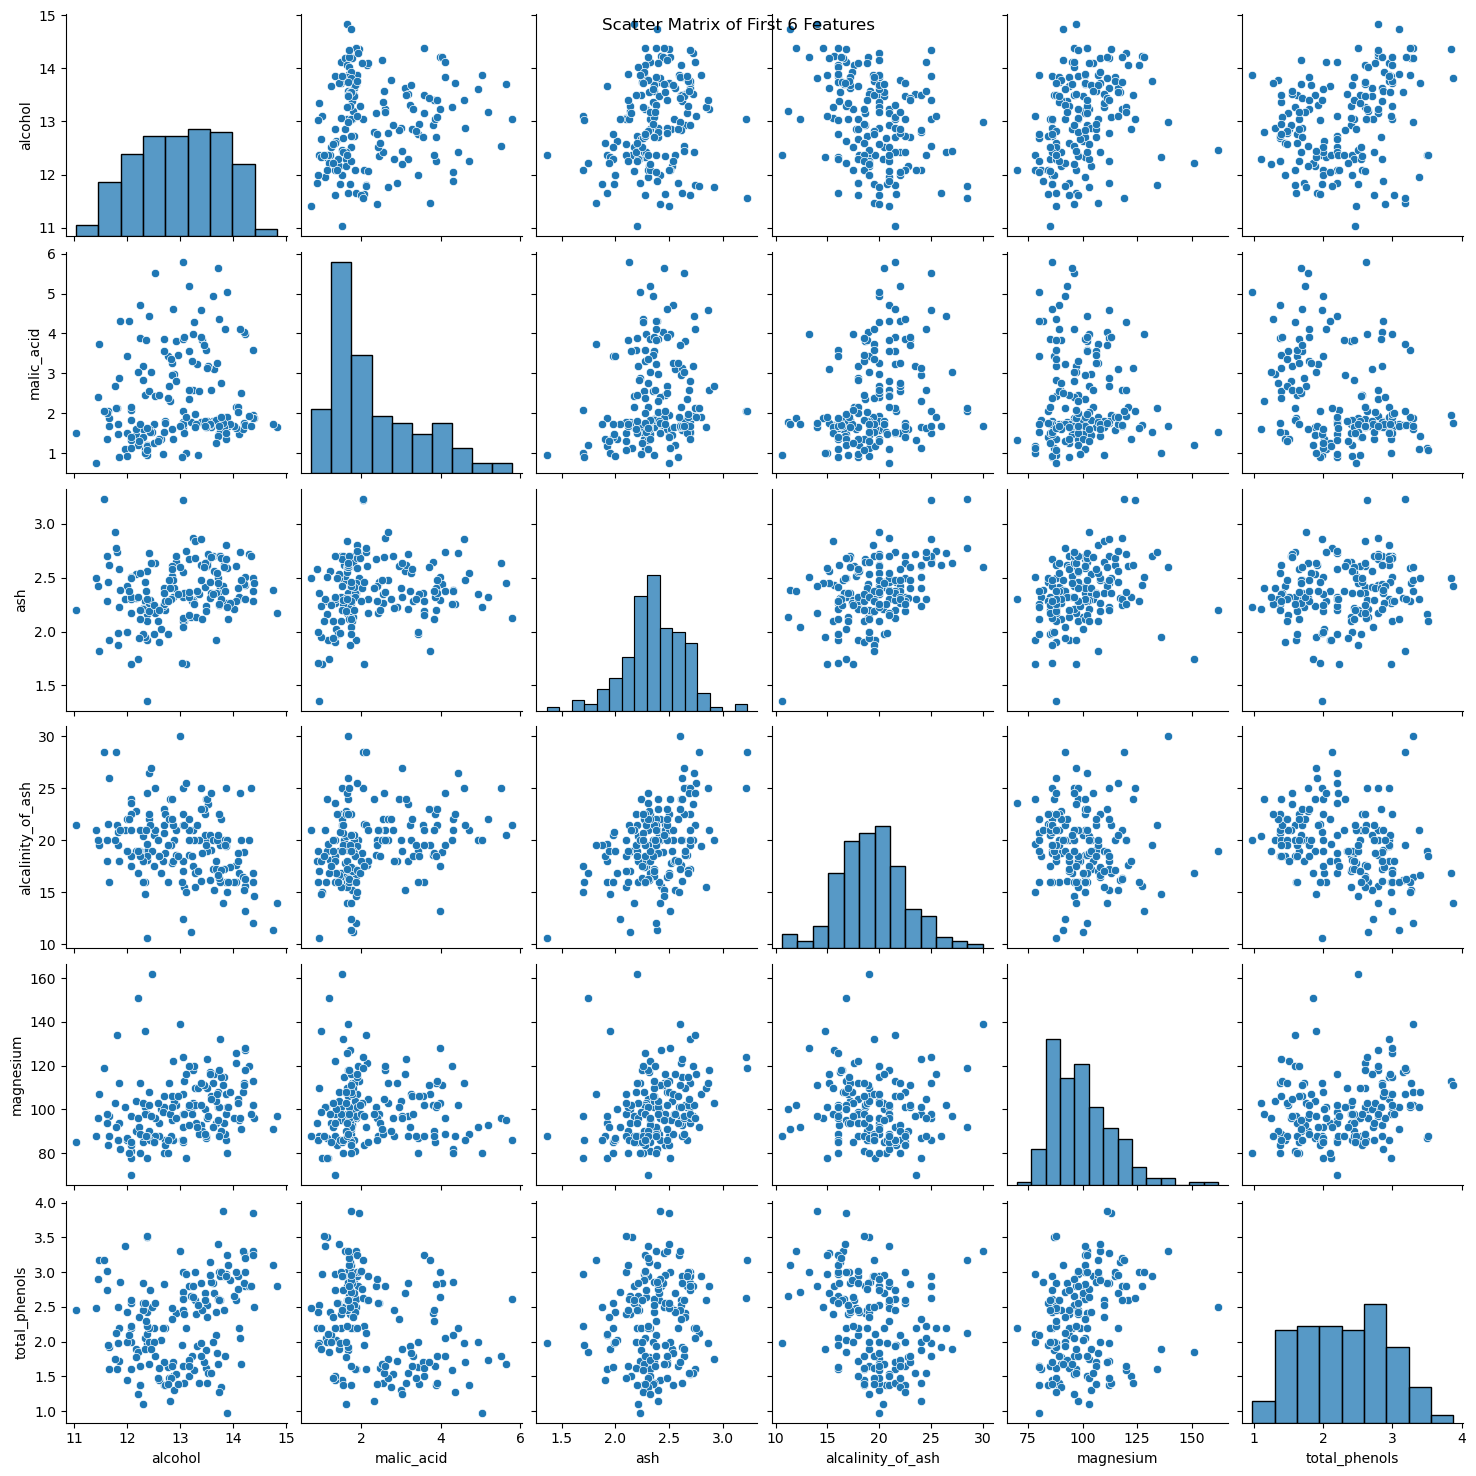

In [13]:
sns.pairplot(df.iloc[:, :6])
plt.suptitle("Scatter Matrix of First 6 Features")
plt.show()

In [15]:
df_missing = df.copy()
df_missing.iloc[0:10, 0] = np.nan
df_missing.iloc[5:15, 1] = np.nan

In [17]:
imputer_mean = SimpleImputer(strategy='mean')
df_mean_imputed = pd.DataFrame(imputer_mean.fit_transform(df_missing), columns=df.columns)

In [19]:
imputer_median = SimpleImputer(strategy='median')
df_median_imputed = pd.DataFrame(imputer_median.fit_transform(df_missing), columns=df.columns)

In [21]:
# Using Elliptic Envelope
ee = EllipticEnvelope(contamination=0.05)
X_clean = df.drop(columns='target')
outliers = ee.fit_predict(X_clean)

# Mark outliers
df['outlier'] = outliers
outlier_rows = df[df['outlier'] == -1]
print("Outliers found:\n", outlier_rows)


Outliers found:
      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
69     12.21        1.19  1.75               16.8      151.0           1.85   
73     12.99        1.67  2.60               30.0      139.0           3.30   
78     12.33        0.99  1.95               14.8      136.0           1.90   
95     12.47        1.52  2.20               19.0      162.0           2.50   
96     11.81        2.12  2.74               21.5      134.0           1.60   
110    11.46        3.74  1.82               19.5      107.0           3.18   
121    11.56        2.05  3.23               28.5      119.0           3.18   
150    13.50        3.12  2.62               24.0      123.0           1.40   
158    14.34        1.68  2.70               25.0       98.0           2.80   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
69         1.28                  0.14             2.50             2.85  1.28   
73         2.89               

In [23]:
for col in df.columns[:-2]:  # Exclude 'target' and 'outlier'
    stat, p = stats.shapiro(df[col])
    print(f"{col} - p-value: {p:.4f} {'(Normal)' if p > 0.05 else '(Not Normal)'}")

alcohol - p-value: 0.0200 (Not Normal)
malic_acid - p-value: 0.0000 (Not Normal)
ash - p-value: 0.0387 (Not Normal)
alcalinity_of_ash - p-value: 0.2639 (Normal)
magnesium - p-value: 0.0000 (Not Normal)
total_phenols - p-value: 0.0044 (Not Normal)
flavanoids - p-value: 0.0000 (Not Normal)
nonflavanoid_phenols - p-value: 0.0001 (Not Normal)
proanthocyanins - p-value: 0.0145 (Not Normal)
color_intensity - p-value: 0.0000 (Not Normal)
hue - p-value: 0.0174 (Not Normal)
od280/od315_of_diluted_wines - p-value: 0.0000 (Not Normal)
proline - p-value: 0.0000 (Not Normal)


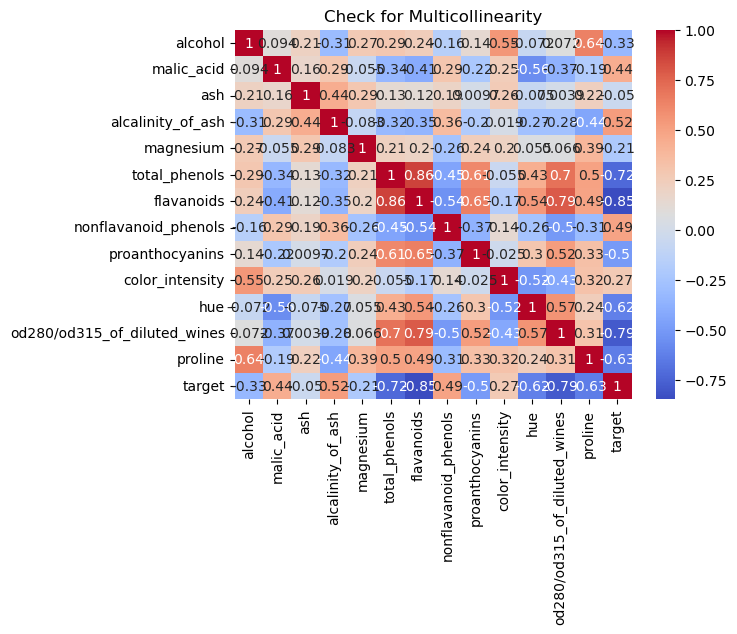

In [25]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Check for Multicollinearity")
plt.show()

In [27]:
summary = """
1. Imported Wine dataset with 13 numerical features and a target class.
2. Performed Canonical Correlation Analysis on first and second halves of the dataset.
3. Calculated mean vector, covariance matrix, and correlation matrix.
4. Visualized data using histograms, heatmaps, and scatter plots.
5. Introduced missing values and handled them using Mean and Median imputation.
6. Detected multivariate outliers using Elliptic Envelope method.
7. Tested assumptions: Shapiro-Wilk for normality, correlation matrix for multicollinearity.
"""
print(summary)



1. Imported Wine dataset with 13 numerical features and a target class.
2. Performed Canonical Correlation Analysis on first and second halves of the dataset.
3. Calculated mean vector, covariance matrix, and correlation matrix.
4. Visualized data using histograms, heatmaps, and scatter plots.
5. Introduced missing values and handled them using Mean and Median imputation.
6. Detected multivariate outliers using Elliptic Envelope method.
7. Tested assumptions: Shapiro-Wilk for normality, correlation matrix for multicollinearity.

